# Confidence Interval + Margin of Error for Means:
- When Sigma is Kown
- When Sigma is NOT known

## Sampling Distribution:
- pop.mean = u
- pop.sd = sigma
- sample.size = n
- sample.mean = u
- sample.sd = sigma/sqrt(n)

### Example 1: Student IQ Test when Sigma is known:
- Normally Distributed
- Population Mean = 100
- Population SD = 15
- Sample Size = 9
- Sample Mean = 100 (xbar, Sample Mean of Sampling Distribution, will be close to 100)
- Sample SD = 15/sqrt(9)
- As Sample Count increases, Distribution of Mean of Means (xbar) will approach Normal Distribution

|         | Population |  n = 9  | n = 16  |  n = 25 | n = 100 |
|:--------|:-----------|:--------|:--------|:--------|:--------|
| Mean    |100         | 100     | 100     | 100     | 100     |
| SD      |15          | 5       | 3.75    | 3       | 1.5     |

## Confidence Interval:
- Standard Error, SE = pop.sd/sqrt(sample.size) = sigma/sqrt(n)
- Margin of Error = z * SE = z * (sigma/sqrt(n))
- Confidence Interval = Sample Mean +/- Margin of Error = u +/- z * (sigma/sqrt(n))

### % Confidence:
- Area between left and right z scores
- As %Confidence increases, Confidence Interval also increases

#### Find z-score for % confidence:
- 90% confidence: z = qnorm( (1-0.9)/2 )  = -1.645
    - Area in each Tail: (1-0.9)/2 = 0.05
- 95% confidence: z = qnorm( (1-0.95)/2 )  = -1.96
    - Area in each Tail: (1-0.95)/2 = 0.025
- 99% confidence: z = qnorm( ((1-0.99)/2 ) = -2.575
    - Area in each Tail: (1-0.99)/2 = 0.005

### Example: When sigma is known

In [15]:
interval_confidence <- function(pop.mean=100, pop.sd=15, sample.size=9, sample.count=20, confidence=0.95){
  
  # Initialize variables:
  pop.mean <- pop.mean
  sigma <- pop.sd
  n <- sample.size
  sample.count <- sample.count
  
  #Compute z-score, SE, and ME based on % confidence
  confidence <- confidence
  z <- abs(qnorm((1-confidence)/2))   
  std_error <- sigma/sqrt(n)    
  margin_error <- z * std_error 
  
  # Create a Data Frame
  xbar <- data.frame(mean=1:sample.count)
  
  for (i in 1:sample.count){
    #Generate Sampling Distributions based on Population Mean and SD
    xbar$mean[i] <- mean(rnorm(n, mean=pop.mean, sd=sigma))
    #Create a column "margin" for Margin of Error
    xbar$margin[i] <- margin_error
    #Create a column "lower.interval" for Lower Bound Confidence Interval
    xbar$lower.interval[i] <- xbar$mean[i] - xbar$margin[i]
    #Create a column "upper.interval" for Upper Bound Confidence Interval
    xbar$upper.interval[i] <- xbar$mean[i] + xbar$margin[i]
    #Create a column "contains.mean" to check if Interval contains the Mean
    xbar$contains.mean[i] <- xbar$lower.interval[i] <= pop.mean &  xbar$upper.interval[i] >= pop.mean
  }
  xbar
}

#### 90% Confidence with Population Mean = 100, SD = 15, Sample Size = 9, Sample Count at 20

In [16]:
u <- 100
sigma <- 15
n <- 9
count <- 20

interval_confidence(pop.mean=u, pop.sd=sigma, sample.size=n, sample.count=count, confidence=0.90)
# Can execute function without parameters if values are equal to default values: interval_confidence()

mean      margin   lower.interval upper.interval contains.mean
1   89.06242 8.224268  80.83815       97.28668      FALSE        
2   99.14919 8.224268  90.92492      107.37345       TRUE        
3   99.22203 8.224268  90.99776      107.44630       TRUE        
4   97.50883 8.224268  89.28456      105.73309       TRUE        
5  101.04508 8.224268  92.82081      109.26935       TRUE        
6   98.24079 8.224268  90.01652      106.46506       TRUE        
7  105.19361 8.224268  96.96934      113.41788       TRUE        
8   93.53526 8.224268  85.31100      101.75953       TRUE        
9   97.60321 8.224268  89.37895      105.82748       TRUE        
10 108.02655 8.224268  99.80229      116.25082       TRUE        
11 100.70148 8.224268  92.47721      108.92575       TRUE        
12  93.63574 8.224268  85.41147      101.86001       TRUE        
13 104.82230 8.224268  96.59803      113.04656       TRUE        
14  89.99449 8.224268  81.77022       98.21876      FALSE        
15  94.31113 8.224268  86.08686      102.53540       TRUE        
16 112.52470 8.224268 104.30043      120.74897      FALSE        
17  97.81696 8.224268  89.59269      106.04123       TRUE        
18 102.00866 8.224268  93.78439      110.23293       TRUE        
19  96.23021 8.224268  88.00594      104.45448       TRUE        
20 113.18400 8.224268 104.95973      121.40827      FALSE

### Interpretation of Confidence Interval:
- If number of samples are increased, proportion of samples that capture the population mean will approach %Confidence


### Example 2: Compute the Confidence Interval of the Average Speed of Cars on Highway (when Sigma is known):
- Sample Data of Speed of cars: 57.4, 44.2, 62.2, 56.1, 68.6, 60.4, 70.3, 66.1, 64.5, 65.6, 57.3, 52.7
- Sample Mean = 59.62
- Population SD = sigma = 8
- Sample Size = n = 12
- Confidence Interval = 90%

#### Solution:
- Significance = (1-0.9)/2 = 0.05
- z(of 0.05) = 1.645
- Margin of Error = ME = z*(sigma/sqrt(n)) = 1.645 * (8/sqrt(12)) = 3.80
- 90% Confidence Interval = Mean +/- ME = 59.62 +/- 3.80
- 90% Confidence Interval = 55.82 – 63.42

In [9]:
data <- c(57.4, 44.2, 62.2, 56.1, 68.6, 60.4, 70.3, 66.1, 64.5, 65.6, 57.3, 52.7)
sample.mean <- mean(data)
sigma <- 8
n <- 12

#90% Confidence:
confidence <- 0.9
z <- abs(qnorm((1-confidence)/2))  
std.error <- sigma/sqrt(n)    
margin.error <- z * std.error

lower.interval <- sample.mean - margin.error
upper.interval <- sample.mean + margin.error
paste(lower.interval, " to ", upper.interval)

[1] "56.6513732628081  to  64.2486267371919"

<hr>

## Confidence Interval Estimation when Sigma is NOT Known
How to predict the value of Population Mean when sigma is NOT given

### Use Sample SD instead of Population SD, using t-statistics instead of z-statistics
- Standard Error, SE = sample.sd/sqrt(sample.size) = s/sqrt(n)
- Margin of Error = t * SE = t * (s/sqrt(n))
- Confidence Interval = Sample Mean +/- Margin of Error = u +/- t * (s/sqrt(n))

## t-distribution:
- Depended on degree of freedom
- As degree of freedom increase, t-statistics become closer to z-statistics

#### dt() family of functions work similar to pnrom() family of functions

In [10]:
#?dt

#### Generate vector of sequence drom -4 to +4 and Plot as a normal distribution curve:
- dnorm generates density for distribution
- Plot t-distribution curves with increasing degree of freedom
- As degree of freedom increaes, the t-distibution approaches normal distribution
- Use lines() to plot on the same graph: same as plot() with type='l' argument

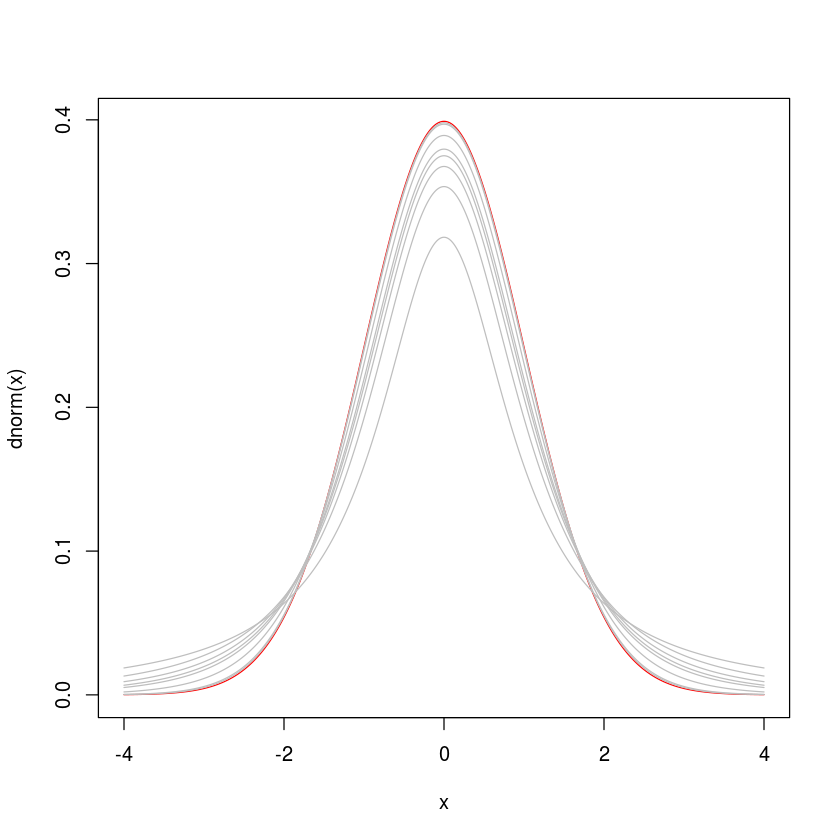

In [12]:
x <- seq(-4,4,0.01)
plot(x,dnorm(x),type='l', col='red')
lines(x,dt(x,df=1),col='grey')
lines(x,dt(x,df=2),col='grey')
lines(x,dt(x,df=3),col='grey')
lines(x,dt(x,df=4),col='grey')
lines(x,dt(x,df=5),col='grey')
lines(x,dt(x,df=10),col='grey')
lines(x,dt(x,df=50),col='grey')
lines(x,dt(x,df=100),col='grey')

### Comparing t-distribution with degree of freedom=100 to Normal Distribution

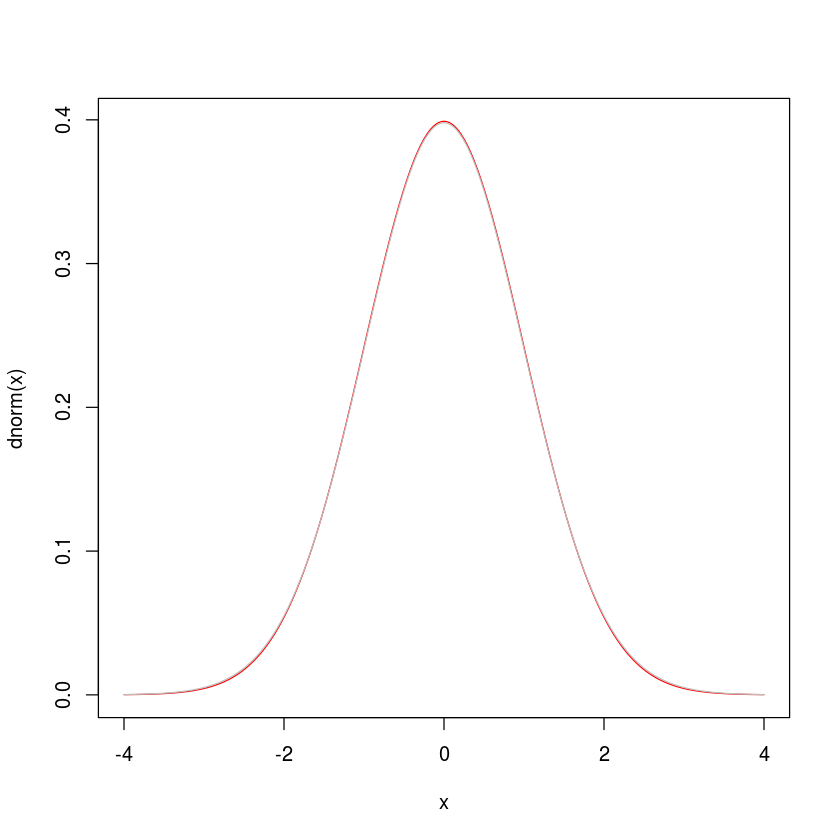

In [13]:
plot(x,dnorm(x),type='l', col='red')
lines(x,dt(x,df=100),col='grey')